<h1>Heart Attack Risk Analysis and Prediction</h1>

This project involves analyzing an AI-generated dataset designed to mimic real-world heart attack risk factors. The dataset consists of 26 columns and 8,763 entries, containing various health-related attributes listed below:

- Patient ID --- Unique identifier for each patient
- Age --- Age of the patient
- Sex --- Gender of the patient (Male/Female)
- Cholesterol --- Cholesterol levels of the patient
- Blood Pressure --- Blood pressure of the patient (systolic/diastolic)
- Heart Rate --- Heart rate of the patient
- Diabetes --- Whether the patient has diabetes (Yes/No)
- Family History --- Family history of heart-related problems (1: Yes, 0: No)
- Smoking --- Smoking status of the patient (1: Smoker, 0: Non-smoker)
- Obesity --- Obesity status of the patient (1: Obese, 0: Not obese)
- Alcohol Consumption --- Level of alcohol consumption by the patient (1: Yes, 0: No)
- Exercise Hours Per Week --- Number of exercise hours per week
- Diet --- Dietary habits of the patient (Healthy/Average/Unhealthy)
- Previous Heart Problems --- Previous heart problems of the patient (1: Yes, 0: No)
- Medication Use --- Medication usage by the patient (1: Yes, 0: No)
- Stress Level --- Stress level reported by the patient (1-10)
- Sedentary Hours Per Day --- Hours of sedentary activity per day
- Income --- Yearly income level of the patient (in USD)
- BMI --- Body Mass Index (BMI) of the patient
- Triglycerides --- Triglyceride levels of the patient
- Physical Activity Days Per Week --- Days of physical activity per week
- Sleep Hours Per Day --- Hours of sleep per day
- Country --- Country of the patient
- Continent --- Continent where the patient resides
- Hemisphere --- Hemisphere where the patient resides
- Heart Attack Risk --- Presence of heart attack risk (1: Yes, 0: No)

The goal of this project is to extract meaningful insights from the data through exploratory data analysis (EDA) and statistical methods. Additionally, a machine learning model will be developed to predict the probability of a person experiencing a heart attack based on their features. Various evaluation metrics will be used to assess the model’s performance, ensuring it provides accurate and reliable predictions.

<h2>Importing libraries</h2>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<h2>1) Importing and analyzing the dataset</h2>

We will load the dataset, and view the first 5 rows to view the imported dataset in more detail.

In [44]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Now that we have imported the dataset, we will explore the dataset so that we have a general understanding of what the dataset looks like. We will use:

- .shape to denote the number of rows and columns
- .columns to ensure that we have all the desired columns available
- .describe to get a summary for each column of the dataset

In [45]:
print('SHAPE:', df.shape)
print('\nCOLUMNS:\n  ', df.columns)
print('\nSUMMARY:\n', df.describe())

SHAPE: (8763, 26)

COLUMNS:
   Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

SUMMARY:
                Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   


<h2>2) Data Preprocessing</h2>

We will check our dataset for any missing values. If found, we will have to drop the null columns.

In [46]:
print(df.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


Although we do not have any null values in the dataset, we will drop null values as it is good coding practice.

In [47]:
df = df.dropna()
df.shape

(8763, 26)

To make better use of the data, we will set the 'Patient ID' column as the primary key. However, we need to make sure that it meets the requirements of being made the primary key, i.e. it should hold only unique values.

In [48]:
df['Patient ID'].unique().shape[0] == df.shape[0]

True

Now that we are sure that it holds only unique values, we will set 'Patient ID' as the primary key.

In [49]:
df = df.set_index('Patient ID')
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
Patient ID,,,,,,,,,,,,,,,,,,,,,
BMW7812,67,Male,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
CZE1114,21,Male,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
BNI9906,21,Female,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
JLN3497,84,Male,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
GFO8847,66,Male,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


From here onwards, for the purpose of readability, we will convert the dataset values from numeric to strings. This would provide a better information of the information we have regarding each feature.

In [50]:
df['Sex'] = df['Sex'].replace({'M': 'Male', 'F': 'Female'}) 
df['Diabetes'] = df['Diabetes'].replace({1: 'Yes', 0: 'No'})
df['Family History'] = df['Family History'].replace({1: 'Yes', 0: 'No'})
df['Smoking'] = df['Smoking'].replace({1: 'Smoker', 0: 'Non-Smoker'})
df['Obesity'] = df['Obesity'].replace({1: 'Obese', 0: 'Not Obese'})
df['Alcohol Consumption'] = df['Alcohol Consumption'].replace({1: 'Consumes Alcohol', 0: 'Doesnt consume alcohol'})
df['Previous Heart Problems'] = df['Previous Heart Problems'].replace({1: 'Yes', 0: 'No'})
df['Medication Use'] = df['Medication Use'].replace({1: 'Yes', 0: 'No'})
df['Heart Attack Risk'] = df['Heart Attack Risk'].replace({1: 'At Risk', 0: 'No Risk'})

Next, we split "Blood Pressure" into two numeric columns, "Systolic" and "Diastolic"

In [51]:
bp_index = df.columns.get_loc("Blood Pressure")
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.drop(columns=['Blood Pressure'], inplace=True)
df = pd.concat([df.iloc[:, :bp_index], df[['Systolic', 'Diastolic']], df.iloc[:, bp_index:]], axis=1)

<h2>3) Data Visualization</h2>

We will now investigate to see how many individuals in the dataset pose a heart attack risk as compared to ones who don't. 

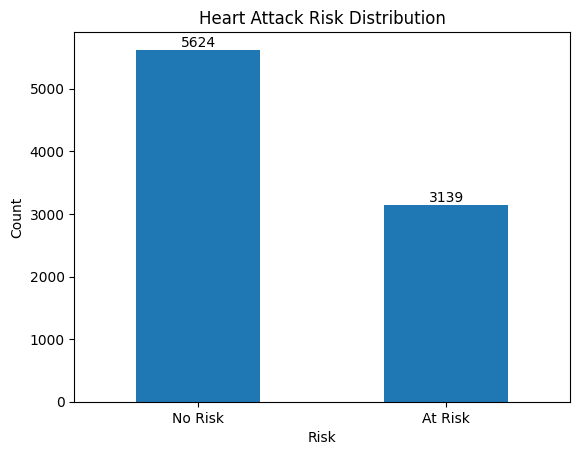

In [52]:
ax = df['Heart Attack Risk'].value_counts().plot(kind='bar')
plt.title('Heart Attack Risk Distribution')
plt.xlabel('Risk')
plt.ylabel('Count')
plt.xticks(rotation=0)
# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")
plt.show()

Seeing that there is some difference in the number of individuals having heart attack against those who do not, we will check for class imbalances in any other feature as well. As we have divided our dataset into two main streams - clinical and demographic factors - we will view the details accordingly:

<h3>i. Clinical factors</h3>

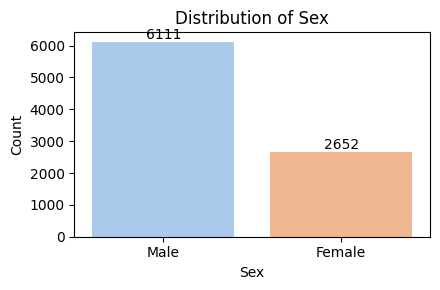

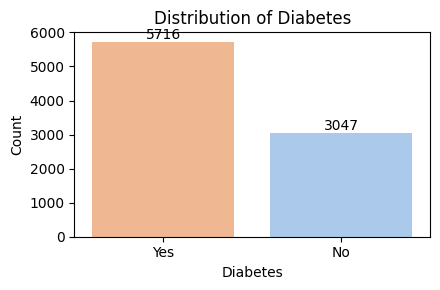

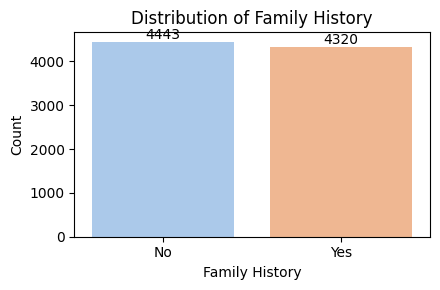

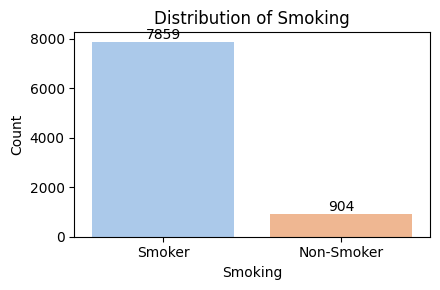

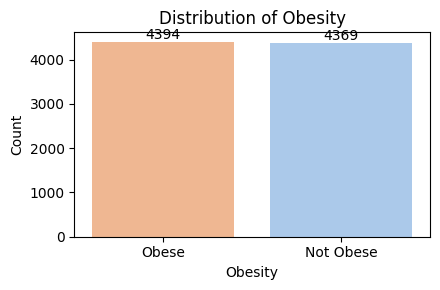

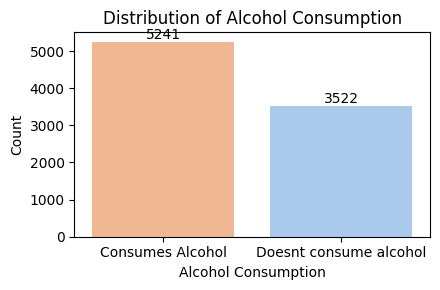

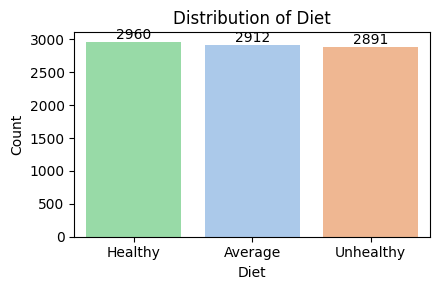

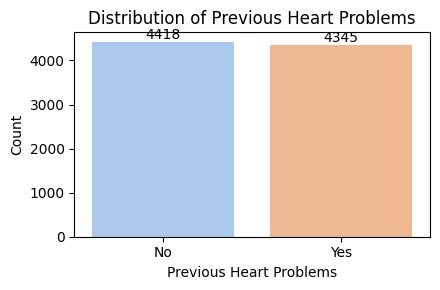

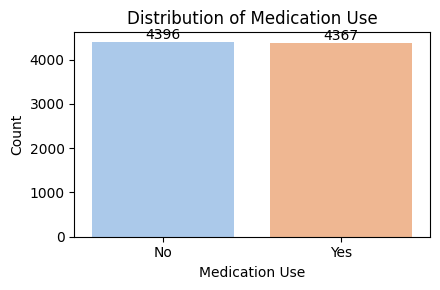

In [ ]:
for col in clinical_factors:
    plt.figure(figsize=(4.5, 3))
    data_to_plot = df[col].copy()

    if set(data_to_plot.dropna().unique()) <= {0, 1}:
        data_to_plot = data_to_plot.map({0: 'No', 1: 'Yes'})
        palette_colors = {"No": "blue", "Yes": "red"}
        order = ['No', 'Yes']
    else:
        palette_colors = "pastel"
        order = data_to_plot.value_counts().index
    
    plot_df = data_to_plot.to_frame(name='value')

    ax = sns.countplot(data=plot_df,x='value',hue='value',  palette=palette_colors,order=order,dodge=False  )

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")

    plt.tight_layout()
    plt.show()


<h3>ii. Demographic factors</h3>

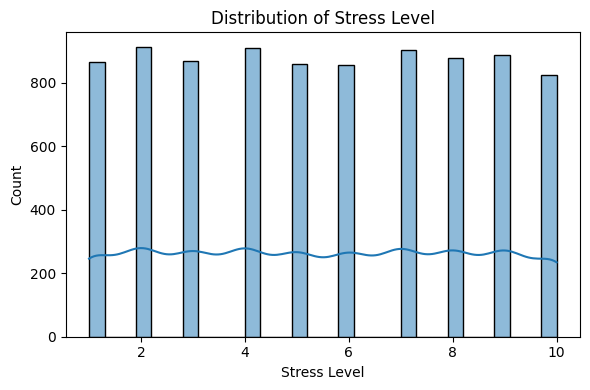

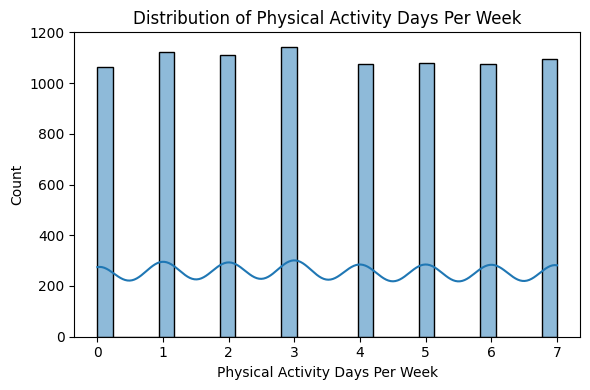

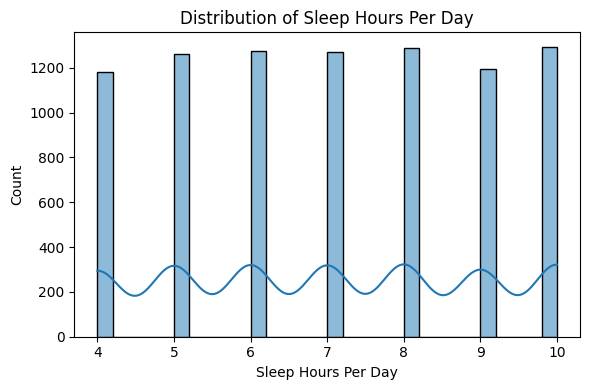

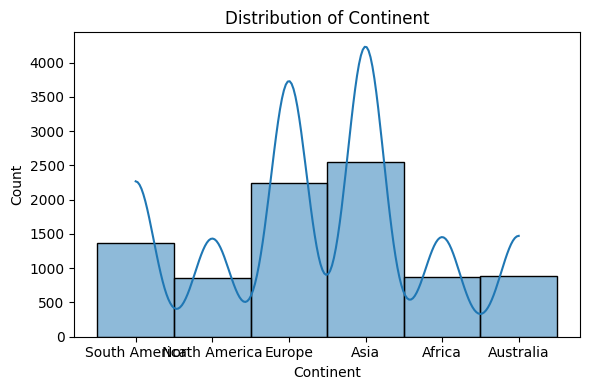

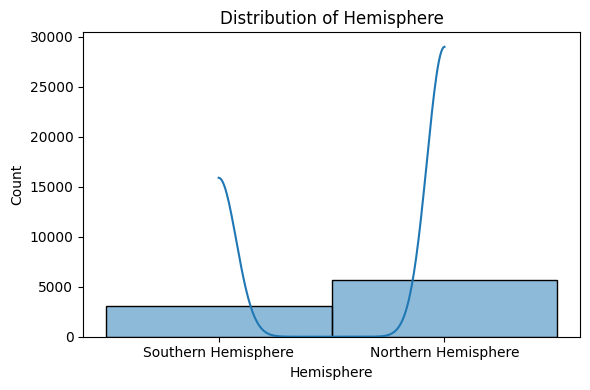

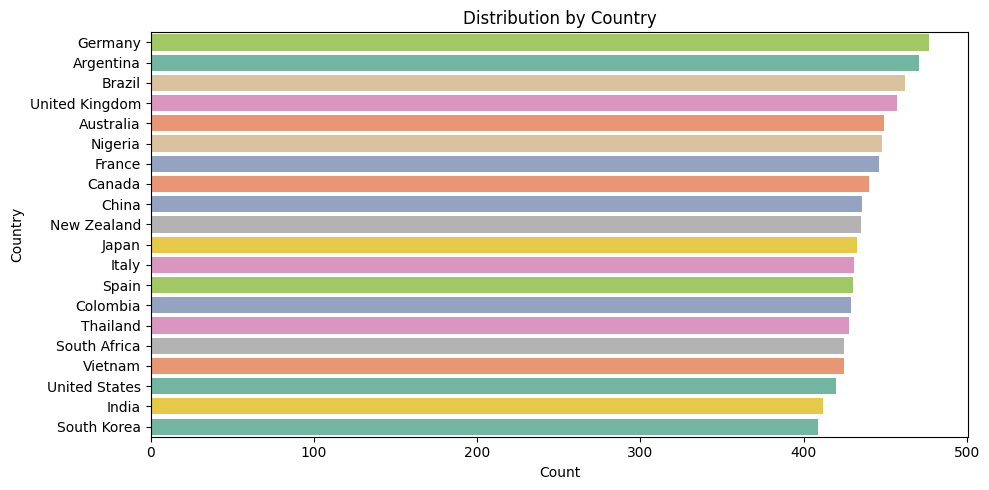

In [56]:
demographic_factors = ['Stress Level', 'Physical Activity Days Per Week',
                       'Sleep Hours Per Day', 'Continent', 'Hemisphere']

for col in demographic_factors:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(y=df['Country'], order=df['Country'].value_counts().index, palette='Set2',hue=df['Country'],)
plt.title('Distribution by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

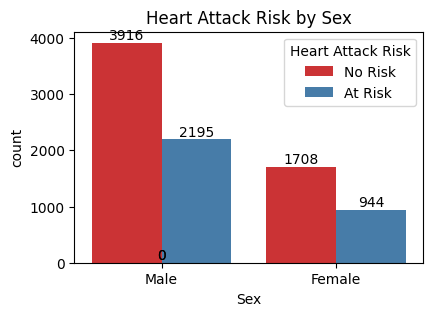

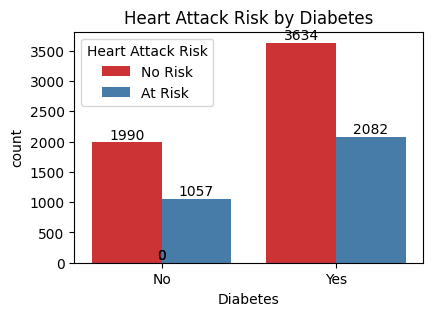

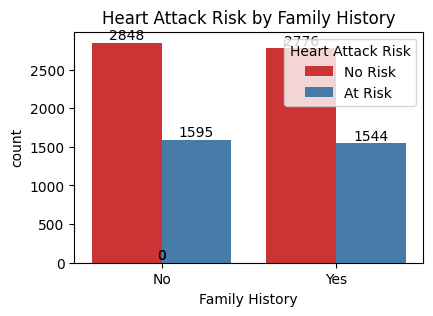

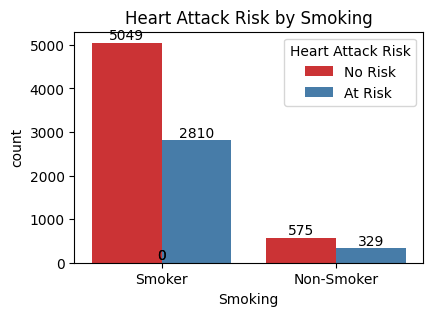

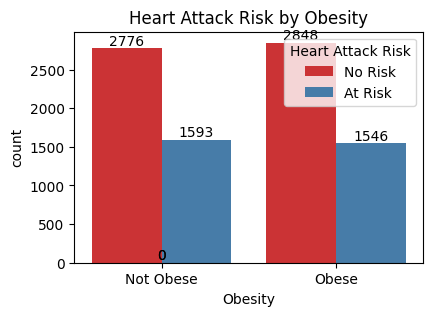

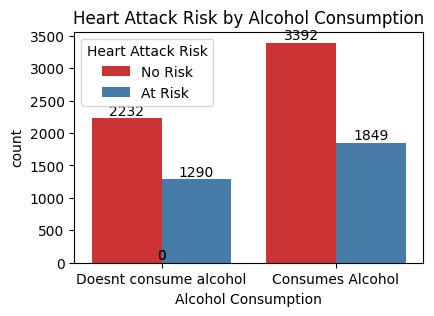

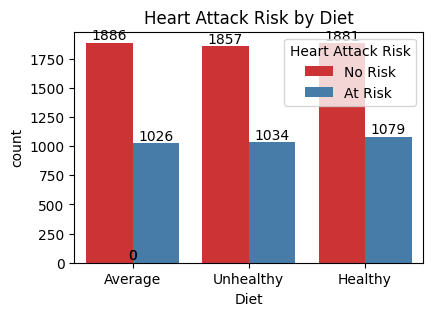

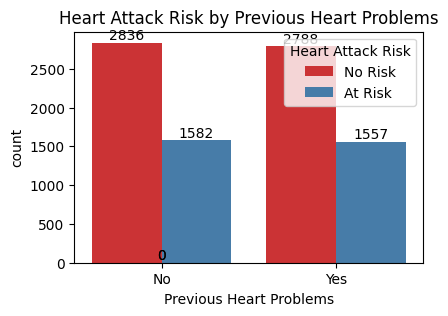

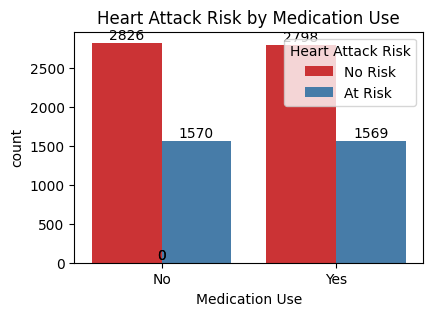

In [ ]:
for col in clinical_factors:
    plt.figure(figsize=(4.5, 3))
    ax = sns.countplot(x=df[col], hue=df['Heart Attack Risk'], palette='Set1')
    plt.title(f'Heart Attack Risk by {col}')
    plt.xticks(rotation=0)
    plt.legend(title='Heart Attack Risk')

    # Add counts on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")

    plt.show()

In [ ]:
# Reconverting strings back to floats
df['Sex'] = df['Sex'].replace({'Male': 1, 'Female': 0}) 
df['Diabetes'] = df['Diabetes'].replace({'Yes': 1, 'No': 0})
df['Family History'] = df['Family History'].replace({'Yes': 1, 'No': 0})
df['Smoking'] = df['Smoking'].replace({'Smoker': 1, 'Non-Smoker': 0})
df['Obesity'] = df['Obesity'].replace({'Obese': 1, 'Not Obese': 0})
df['Alcohol Consumption'] = df['Alcohol Consumption'].replace({'Consumes Alcohol': 1, 'Doesnt consume alcohol': 0})
df['Previous Heart Problems'] = df['Previous Heart Problems'].replace({'Yes': 1, 'No': 0})
df['Medication Use'] = df['Medication Use'].replace({'Yes': 1, 'No': 0})
df['Heart Attack Risk'] = df['Heart Attack Risk'].replace({'At Risk': 1, 'No Risk': 0})

/var/folders/nk/q9hvvljd0s12chs1pdr40ld80000gn/T/ipykernel_50790/439158619.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'Male': 1, 'Female': 0})
/var/folders/nk/q9hvvljd0s12chs1pdr40ld80000gn/T/ipykernel_50790/439158619.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diabetes'] = df['Diabetes'].replace({'Yes': 1, 'No': 0})
/var/folders/nk/q9hvvljd0s12chs1pdr40ld80000gn/T/ipykernel_50790/439158619.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed i

<h2>Making Scaler Class</h2>

In [ ]:
class StandardScaler:
    def __init__(self):
        self.mean = {}
        self.sd = {}
    
    def fit(self, data):
        data = data.to_numpy(dtype=float)
        # data = data.select_dtypes(include=[np.number]).to_numpy()
        for i in range(data.shape[1]):
            self.mean[i] = np.mean(data[:, i])
            self.sd[i] = np.std(data[:, i])
    
    def transform(self, data):
        data = data.to_numpy()
        standardized_data = data
        for i in range(data.shape[1]):
            standardized_data[:, i] = (data[:, i] - self.mean[i]) / self.sd[i]
        
        return standardized_data

<h2>Making a Linear Regression Model</h2>

In [ ]:
class LinearRegression:
    def __init__(self, lr, size):
        self.theta_0 = 0
        self.theta_1 = 0
        self.learning_rate = lr
        self.no_of_iterations = size
        self.scalerizer = StandardScaler()


    def fit(self, train_data, train_label):
        self.scalerizer.fit(train_data)
        final_data = self.scalerizer.transform(train_data)  # Standardized data

        loss_values = []
        m, n = final_data.shape
        self.theta_1 = np.zeros(n)

        for _ in range(self.no_of_iterations):
            predictions = self.theta_0 + np.dot(final_data, self.theta_1)       # Calculating dot product
            error = predictions - train_label

            temp0 = np.sum(error) / m
            temp1 = np.dot(final_data.T, error) / m
            self.theta_0 = self.theta_0 - (self.learning_rate * temp0)
            self.theta_1 = self.theta_1 - (self.learning_rate * temp1)

            loss_i = np.mean(error ** 2) / 2
            loss_values.append(loss_i)

        return loss_values


    def score(self, test_data, test_labels):
        test_data_stdized = self.scalerizer.transform(test_data)
        predictions = self.theta_0 + np.dot(test_data_stdized, self.theta_1)
        m = len(test_data_stdized)
        MSE = np.sum((predictions - test_labels) ** 2) / (2 * m)
        return MSE


    def predict(self, test_data):
        test_data_stdized = self.scalerizer.transform(test_data)
        predicted_labels = self.theta_0 + np.dot(test_data_stdized, self.theta_1)
        return predicted_labels.tolist()

In [ ]:
from imblearn.over_sampling import SMOTE

y = df['Heart Attack Risk']
X = df.drop('Heart Attack Risk', axis=1)

# Setting up a required variables
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)
train_X_numeric = train_X.select_dtypes(include=[np.number])
test_X_numeric = test_X.select_dtypes(include=[np.number])

# Apply SMOTE to the training set to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(train_X_numeric, train_y)
X_test_smote, y_test_smote = smote.fit_resample(test_X_numeric, test_y)


/Users/ans/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/ans/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Mean Square Error for training set: 0.11564317743484297
Mean Square Error for test set:     0.11664443827502805


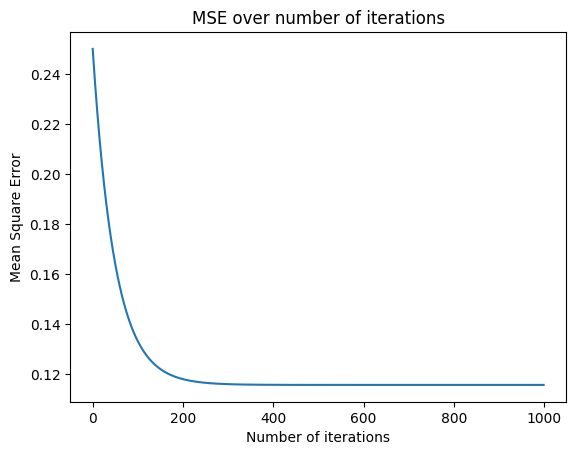

In [ ]:
# Training
testing = LinearRegression(0.01, 1000)
loss_values = testing.fit(X_train_smote, y_train_smote)
predictions = testing.predict(X_test_smote)

# Scoring
MSN_train = testing.score(X_train_smote, y_train_smote)
MSN_test = testing.score(X_test_smote, y_test_smote)

print('Mean Square Error for training set:', MSN_train)
print('Mean Square Error for test set:    ', MSN_test)

# Plotting
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel("Number of iterations")
plt.ylabel("Mean Square Error")
plt.title("MSE over number of iterations")
plt.show()

Best Threshold: 0.57
Best Accuracy: 0.6173144876325088


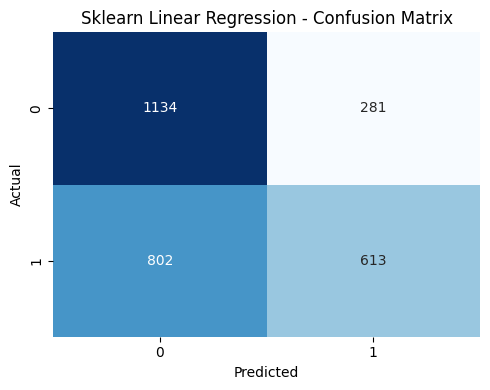

Sklearn Linear Regression - Evaluation Metrics
Precision: 0.685682326621924
Recall: 0.4332155477031802
F1 Score: 0.5309657860545691

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.80      0.68      1415
           1       0.69      0.43      0.53      1415

    accuracy                           0.62      2830
   macro avg       0.64      0.62      0.60      2830
weighted avg       0.64      0.62      0.60      2830



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_test, y_pred, model_name):
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot Heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Print classification report
    print(f"{model_name} - Evaluation Metrics")
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Convert list to NumPy array
y_pred_continuous = np.array(testing.predict(X_test_smote))

# probs = testing.predict_proba(X_test_smote)[:, 1]
# y_pred = (probs >= 0.3).astype(int)  # Adjust threshold
# Apply threshold to get binary predictions

from sklearn.metrics import accuracy_score
best_threshold = 0
best_accuracy = 0

thresholds = [i / 100 for i in range(0, 101)]  # Thresholds from 0.00 to 1.00

for t in thresholds:
    y_pred_binary = (y_pred_continuous >= t).astype(int)
    acc = accuracy_score(y_test_smote, y_pred_binary)
    if acc > best_accuracy:
        best_accuracy = acc
        best_threshold = t

print(f"Best Threshold: {best_threshold}")
print(f"Best Accuracy: {best_accuracy}")


y_pred_binary = (y_pred_continuous >= best_threshold).astype(int)

# Evaluate
evaluate_model(y_test_smote, y_pred_binary, "Sklearn Linear Regression")



# Evaluate Sklearn Logistic Regression
# evaluate_model(train_y, testing.predict(train_X_numeric), "Sklearn Logistic Regression")

# Evaluate Sklearn Neural Network
# evaluate_model(y_test, y_pred_nn, "Sklearn Neural Network")


Best Threshold: 0.01
Best Accuracy: 0.5254217153718223


/Users/ans/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


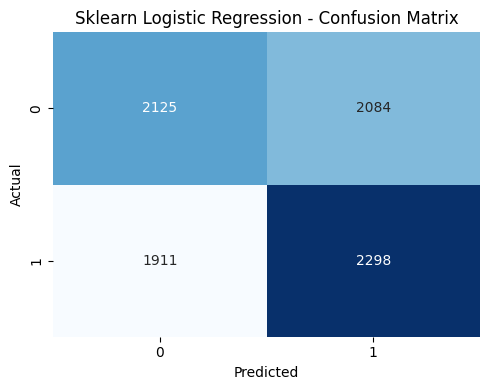

Sklearn Logistic Regression - Evaluation Metrics
Precision: 0.5244180739388408
Recall: 0.5459729151817534
F1 Score: 0.5349784658363403

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.50      0.52      4209
           1       0.52      0.55      0.53      4209

    accuracy                           0.53      8418
   macro avg       0.53      0.53      0.53      8418
weighted avg       0.53      0.53      0.53      8418



In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')  # Automatically adjusts weights
model.fit(X_train_smote, y_train_smote)


# Convert list to NumPy array
y_pred_continuous = np.array(model.predict(X_train_smote))

# probs = testing.predict_proba(X_test_smote)[:, 1]
# y_pred = (probs >= 0.3).astype(int)  # Adjust threshold
# Apply threshold to get binary predictions

from sklearn.metrics import accuracy_score
best_threshold = 0
best_accuracy = 0

thresholds = [i / 100 for i in range(0, 101)]  # Thresholds from 0.00 to 1.00

for t in thresholds:
    y_pred_binary = (y_pred_continuous >= t).astype(int)
    acc = accuracy_score(y_train_smote, y_pred_binary)
    if acc > best_accuracy:
        best_accuracy = acc
        best_threshold = t

print(f"Best Threshold: {best_threshold}")
print(f"Best Accuracy: {best_accuracy}")


y_pred_binary = (y_pred_continuous >= best_threshold).astype(int)

# Evaluate
evaluate_model(y_train_smote, y_pred_binary, "Sklearn Logistic Regression")



# Evaluate Sklearn Logistic Regression
# evaluate_model(train_y, testing.predict(train_X_numeric), "Sklearn Logistic Regression")

# Evaluate Sklearn Neural Network
# evaluate_model(y_test, y_pred_nn, "Sklearn Neural Network")
